## ANALISIS DE COMPONENTE
### JAUREGUI ROMERO EDUARDO RAFAEL

IMPORTAMOS LIBRERIAS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

IMPORTAMOS DATOS

In [2]:
datos = pd.read_csv('StudentsPerformance.csv')

In [3]:
datos.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
datos.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
datos.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
datos.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## VISUALIZACION PCA

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [11]:
gender = pd.get_dummies(datos['gender'])
race = pd.get_dummies(datos['race/ethnicity'])
parent = pd.get_dummies(datos['parental level of education'])
lunch = pd.get_dummies(datos['lunch'])
test = pd.get_dummies(datos['test preparation course'])

In [17]:
datos2 = datos.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1)

In [19]:
nuevo = pd.concat([datos2,gender,race,parent,lunch,test],axis=1)
nuevo

,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [22]:
print(f'Dimensiones del Nuevo dataset {len(nuevo.keys())}')

Dimensiones del Nuevo dataset 20


In [24]:
scaler.fit(nuevo)

StandardScaler()

In [26]:
scaled_data = scaler.transform(nuevo)
scaled_data

array([[ 0.39002351,  0.19399858,  0.39149181, ...,  0.74188112,
        -0.74674788,  0.74674788],
       [ 0.19207553,  1.42747598,  1.31326868, ...,  0.74188112,
         1.33914006, -1.33914006],
       [ 1.57771141,  1.77010859,  1.64247471, ...,  0.74188112,
        -0.74674788,  0.74674788],
       ...,
       [-0.46775108,  0.12547206, -0.20107904, ..., -1.34792485,
         1.33914006, -1.33914006],
       [ 0.12609287,  0.60515772,  0.58901542, ...,  0.74188112,
         1.33914006, -1.33914006],
       [ 0.71993682,  1.15336989,  1.18158627, ..., -1.34792485,
        -0.74674788,  0.74674788]])

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)

In [29]:
pca.fit(scaled_data)

PCA(n_components=2)

In [30]:
x_pca = pca.transform(scaled_data)

In [31]:
scaled_data.shape

(1000, 20)

In [32]:
x_pca.shape

(1000, 2)

Text(0, 0.5, 'Sex')

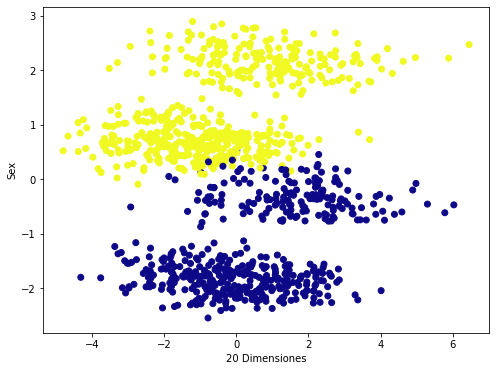

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=nuevo["female"],cmap='plasma')
plt.xlabel('20 Dimensiones')
plt.ylabel('Sex')

## INTERPRETACION DE COMPONENTES

In [36]:
pca.components_

array([[-0.43752587, -0.48120099, -0.49876623, -0.12886207,  0.12886207,
         0.07875266,  0.05237133,  0.00748093, -0.02149307, -0.1066479 ,
        -0.05183979, -0.06594096,  0.12284808, -0.05854436, -0.01779876,
         0.03988253,  0.25703115, -0.25703115, -0.23938418,  0.23938418],
       [-0.22831135,  0.06950705,  0.10234113,  0.57526953, -0.57526953,
        -0.05758802,  0.03248162,  0.11259655, -0.04779019, -0.08014806,
         0.00575961,  0.02700616, -0.04612044,  0.06672345, -0.01148121,
        -0.00969732,  0.33630968, -0.33630968,  0.07471955, -0.07471955]])

In [38]:
data_comp = pd.DataFrame(pca.components_,columns=nuevo['reading score'][:20])

<AxesSubplot:xlabel='reading score'>

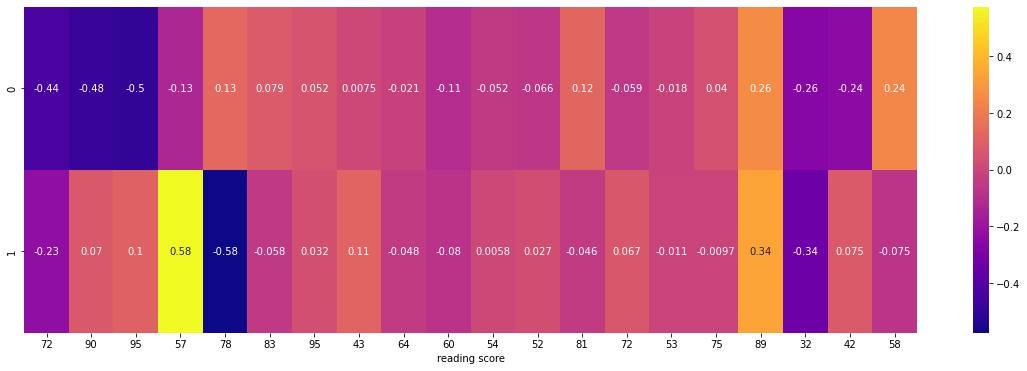

In [42]:
plt.figure(figsize=(20,6))
sns.heatmap(data_comp,cmap='plasma',annot=True)

# VARIANZA EXPLICADA

In [43]:
pca.explained_variance_ratio_

array([0.1737478 , 0.11045093])

In [44]:
np.sum(pca.explained_variance_ratio_)

0.28419872874289515

In [49]:
pca_20 = PCA(n_components=20)
pca_20.fit(scaled_data)

PCA(n_components=20)

In [50]:
pca_20.explained_variance_ratio_

array([1.73747804e-01, 1.10451932e-01, 1.02012582e-01, 7.84137794e-02,
       7.16558785e-02, 6.58251824e-02, 6.28314391e-02, 6.16108829e-02,
       5.98425126e-02, 5.58519543e-02, 5.27518876e-02, 5.11958284e-02,
       4.79759970e-02, 4.14555304e-03, 1.68678761e-03, 1.58795997e-32,
       1.46799841e-32, 7.76444591e-33, 3.17375657e-33, 2.11903277e-33])

In [51]:
np.sum(pca_20.explained_variance_ratio_)

0.9999999999999999

In [53]:
#Encontrar la cantidad de componentes con la mayor varianza explicada
varianza_explicada=[]
for n in range(1,21):
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    varianza_explicada.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varianza Explicada')

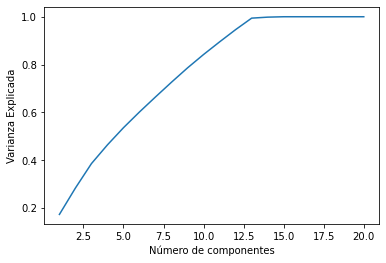

In [54]:
plt.plot(range(1,21),varianza_explicada)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza Explicada")